In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [1]:
def orginal_function(x):
    return np.sqrt(np.abs(x))*np.sin((np.pi/2)*x)

Generate Training Data and Assign Centers

In [52]:
x_centers = [-6, -5, -2, 0, 1, 3, 5]
y_centers = [orginal_function(val) for val in x_centers]

x_training = np.random.uniform(low=-6, high=6, size=1000)
y_training = [orginal_function(val) for val in x_training]

x_testing = np.random.uniform(low=-6, high=6, size=1000)
y_testing = [orginal_function(val) for val in x_testing]

Set up the RBF Class

In [10]:
class RBF:

    def __init__(self, centers, sigma, spread = None):
        self.centers = centers
        self.sigma = sigma
        self.W = np.random.random((len(self.centers), 1))
        self.centers = centers

    def gaussBasisFunc(self, center, x):
        return np.exp(-((np.linalg.norm(x-center)**2) / 2*(self.sigma**2)))

    def calculateActivation(self, X):
        G = np.zeros((X.shape[0], len(self.centers)), float)
        
        for center_index, center in enumerate(self.centers):
            for x_index, x in enumerate(X):
                G[x_index, center_index] = self.gaussBasisFunc(center, x)
        
        return G
                
    
    # function for training
    def fit(self, X, y):
        G = self.calculateActivation(X)
        self.W = np.dot(np.linalg.pinv(G), y)
        
        return self
    

    # function for testing
    def predict(self, X):
        G = self.calculateActivation(X)
        output = np.dot(G, self.W)

        return output

Run the code part A where sigma = 1

In [4]:
print(orginal_function(3.6))

-1.1152441033805536


In [53]:

rbf = RBF(sigma=1, centers=x_centers)
rbf.fit(x_training, y_training)
predictions = rbf.predict(x_testing)


Estimation for y when x = 3.6: [-1.05193877]


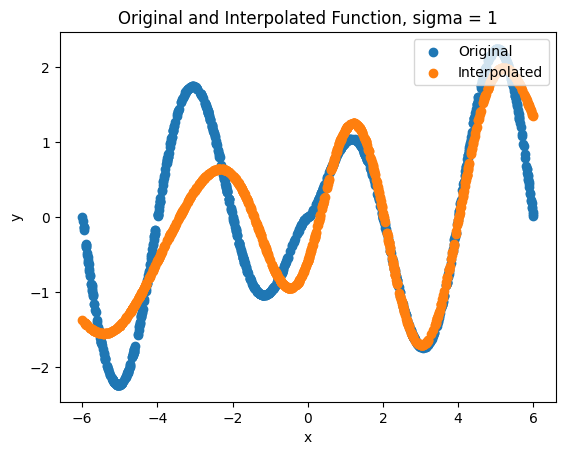

In [54]:
def plot_results(sigma, predictions):
    plt.figure()
    plt.scatter(x_training, y_training, label="Original")
    plt.scatter(x_testing, predictions, label="Interpolated")
    plt.legend(loc="upper right")
    plt.title(f"Original and Interpolated Function, sigma = {sigma}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

guess = rbf.predict(np.array([3.6]))
print(f"Estimation for y when x = 3.6: {guess}")

plot_results(1, predictions)


Run the code for sigma = 0.5, 3, 6

Sigma = 0.5:

Estimation for y when x = 3.6: [-0.83754124]


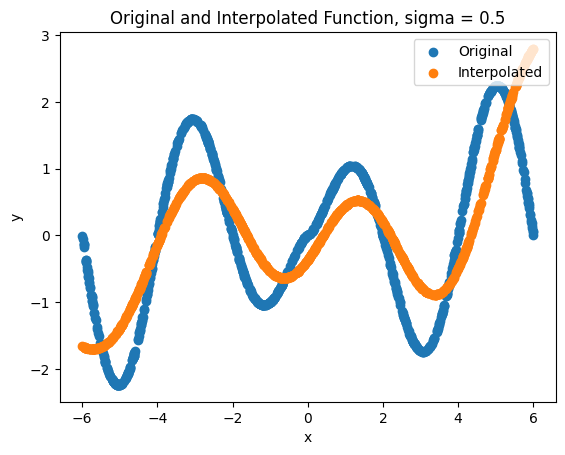

In [55]:
rbf_0_5 = RBF(sigma=0.5, centers=x_centers)
rbf_0_5.fit(x_training, y_training)
predictions_0_5 = rbf_0_5.predict(x_testing)


guess = rbf_0_5.predict(np.array([3.6]))
print(f"Estimation for y when x = 3.6: {guess}")

plot_results(0.5, predictions_0_5)

Sigma = 3

Estimation for y when x = 3.6: [-0.42071269]


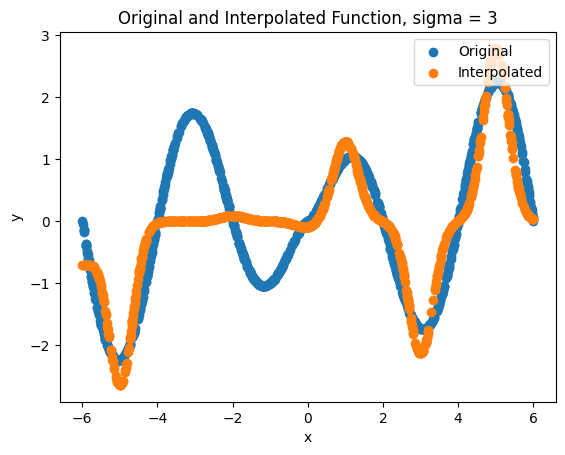

In [56]:
rbf_3 = RBF(sigma=3, centers=x_centers)
rbf_3.fit(x_training, y_training)
predictions_3 = rbf_3.predict(x_testing)

guess = rbf_3.predict(np.array([3.6]))
print(f"Estimation for y when x = 3.6: {guess}")
plot_results(3, predictions_3)

Sigma = 6

Estimation for y when x = 3.6: [-0.00374219]


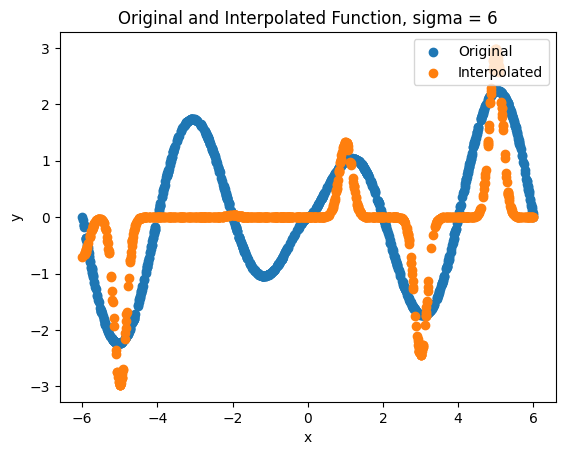

In [57]:
rbf_6 = RBF(sigma=6, centers=x_centers)
rbf_6.fit(x_training, y_training)
predictions_6 = rbf_6.predict(x_testing)

guess = rbf_6.predict(np.array([3.6]))
print(f"Estimation for y when x = 3.6: {guess}")
plot_results(6, predictions_6)